<a href="https://colab.research.google.com/github/Mohamed-Harish-M-123/Capstone-Project-I/blob/main/Airbnb_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name: Airbnb Booking Analysis

Project Type: Exploratory Data Analysis (EDA)

Contribution: Individual


## Exploratory Data Analysis (EDA):
Exploratory Data Analysis (EDA) is an approach to analysing data set to summarise their main characteristic, often with visual methods.

Exploratory Data Analysis does two main things:

1. It helps clean up a dataset.

2. It gives you a better understanding of the variables and the relationships between them.


## About Airbnb:
Airbnb founders Joe Gebbia, Brian Chesky, and Nathan Blecharczyk developed the business in 2008. Initially, Gebbia and Chesky started off using their own place as a bed-and-breakfast to make a few extra bucks to pay rent. Airbnb does not own properties. It acts as an **intermediary between those who want to rent out space and those who are looking for space to rent.** Creating an account on Airbnb is free, and it is relatively simple. Airbnb has listings all over the map, from Savannah, Georgia, to Honolulu, Hawaii, to international listings. The service currently has more than **5.6 million listings in roughly 220 countries around the world.**


##Problem Statement:

###To perform Exploratory Data Analysis (EDA) for the Airbnb booking dataset in order to bring out the hidden insights and to discover key understandings such as:

* Which is the most and least prefered location by the guest ?
* Which is the most prefered host with minimum price ?
* What are the hotels and its price in the most prefered location ?
* Price analysis of room type ?
* Which host has the highest_reviews per month ?
* Find out top 5 host that has high charges for the minimum nights ?
* Compare the number of hosts resides in 'Manhattan' and 'Brooklyn' ?

###Objectives and Goals:

* To perform data cleansing for the given dataset
* To provide visualization to analyze and identify trends in the dataset.




## First let's load our dataset - Airbnb NYC 2019


In [1]:
# import the required python libraries and packages for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# mounting drive in the colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Let's read the dataset from the drive

file_path = "/content/drive/MyDrive/dataset/Airbnb NYC 2019.csv"
airbnbDataFrame = pd.read_csv(file_path)

## Let's summarize our dataset
Following procedures will gives you a better understanding and idea about our dataset.

In [4]:
# Below method will gives you the first 5 records from your dataset

airbnbDataFrame.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# info() method will gives us a better understanding about our columns in the dataset

airbnbDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# This method will be applicable only for int and float dtype columns.
# Also this will gives you more mathematical insights about your dataset.

airbnbDataFrame.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
# Lets find the shape of our dataset in a simple way

airbnbDataFrame.shape

(48895, 16)

In [8]:
# Lets check the columns containing null values in our dataset

nullColumns = airbnbDataFrame.isnull().sum()
print(nullColumns)


#Lets print the total null values present in our dataset.

totalNullCount = airbnbDataFrame.isnull().sum().sum()

print("\nTotal Null values count in our dataset is ",totalNullCount)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Total Null values count in our dataset is  20141


##Observations:
1. Our dataset contains 16 columns and 48895 rows.
2. In that 3 columns were float, 7 columns were int, 6 columns were object dtype.
3. Got the columns that contains null values and the total null count in our dataset.
4. In addition to that, we also got some mathematical insights of our dataset.

##Now let's do data cleaning to make our dataset more consistent

In [9]:
# Let's take a copy of our dataset, so that we have a backup of our original dataset

airbnbCopy = airbnbDataFrame.copy()

In [10]:
# Let's replace all null value in "name" column to the value "Not Mentioned"

airbnbCopy["name"].fillna("Not Mentioned", inplace = True)
airbnbCopy["name"].isnull().sum()

0

In [11]:
# Now replace all null values in "host_name" to "Not Mentioned"

airbnbCopy["host_name"].fillna("Not Mentioned", inplace = True)
airbnbCopy["host_name"].isnull().sum()

0

In [12]:
# Replacing null values in "last_review" to "Not Mentioned"

airbnbCopy["last_review"].fillna("Not Mentioned", inplace = True)
airbnbCopy["last_review"].isnull().sum()

0

In [13]:
# Let's replace null values in "review_per_month" to 0

airbnbCopy["reviews_per_month"].fillna(0, inplace = True)
airbnbCopy["reviews_per_month"].isnull().sum()

0

In [14]:
#Now let's check once again the overall null values in our data frame

airbnbCopy.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

##Let's find solutions for our problem statements.

###Top three locations having more number of hosts


In [15]:
# Now count the occurence of each neighbourhood_group in our dataset

neighbourhood_groupOccurence = airbnbCopy["neighbourhood_group"].value_counts()

print(neighbourhood_groupOccurence)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


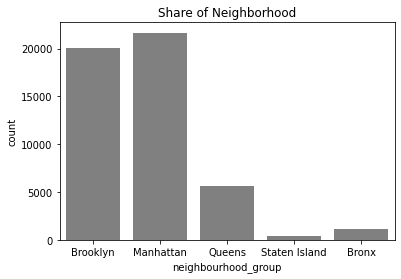

In [16]:
neighbourhoodCount = sns.countplot(x ='neighbourhood_group', color = 'gray', data = airbnbCopy)
neighbourhoodCount.set_title('Share of Neighborhood')
plt.show()

###Top 10 most reviewed hosts in Airbnb NYC

In [17]:
# Here we will sort our data frame by 'number_of_reviews' columns in descending order.
# Print the top 10 entries with the required columns.

most_reviewed_hosts = airbnbCopy.sort_values(by = ['number_of_reviews'], ascending = False)

top_hosts = most_reviewed_hosts[['name', 'host_id', 'neighbourhood_group', 'number_of_reviews', 'room_type']]

top_10_hosts = top_hosts.head(10)

top_10_hosts

,name,host_id,neighbourhood_group,number_of_reviews,room_type
11759,Room near JFK Queen Bed,47621202,Queens,629,Private room
2031,Great Bedroom in Manhattan,4734398,Manhattan,607,Private room
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,597,Private room
2015,Private Bedroom in Manhattan,4734398,Manhattan,594,Private room
13495,Room Near JFK Twin Beds,47621202,Queens,576,Private room
10623,Steps away from Laguardia airport,37312959,Queens,543,Private room
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,540,Private room
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,510,Private room
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,488,Entire home/apt
471,LG Private Room/Family Friendly,792159,Brooklyn,480,Private room


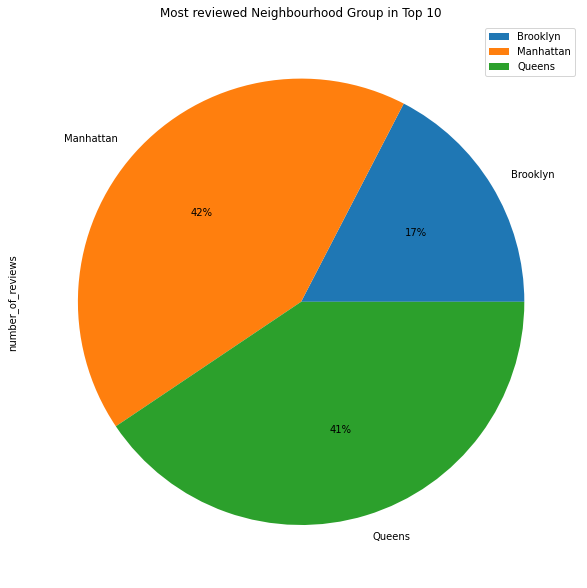

In [18]:
# Let's visualize it through a Pie chart for better understandings.

top_10_hosts.groupby(['neighbourhood_group']).sum().plot(kind='pie', y='number_of_reviews', title='Most reviewed Neighbourhood Group in Top 10', figsize=(10,12), autopct='%1.0f%%')

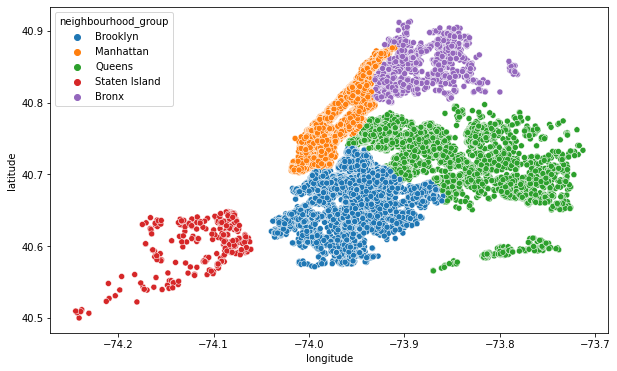

In [19]:
#Let visualize the location of hosts using the longitude and latitude data
#Scatter plot will helps in visualizing multiple data points and grouping

plt.figure(figsize=(10,6))

sns.scatterplot(x=airbnbCopy.longitude, y=airbnbCopy.latitude, hue=airbnbCopy.neighbourhood_group)

###Count analysis on Room types in different neighbourhood groups in NYC

In [20]:
# Let's count the host's room type in all the neighbourhood groups

room_type_count = airbnbCopy.groupby(['neighbourhood_group', 'room_type'])['room_type'].count()

print(room_type_count)

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
Name: room_type, dtype: int64


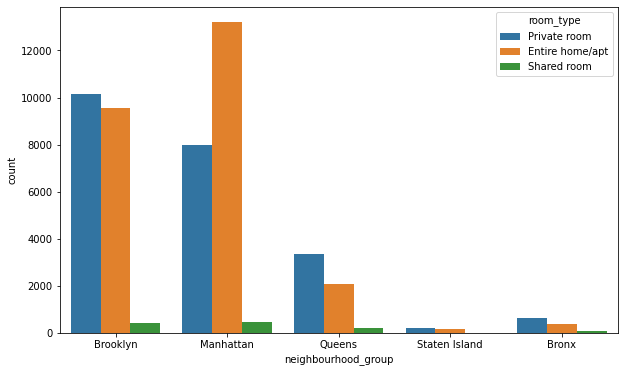

In [21]:
#Let's visualize the above insight using count plot for easy understanding.

plt.figure(figsize=(10,6))

plotting_roomtype = sns.countplot(x='neighbourhood_group', data = airbnbCopy, hue = 'room_type')

plt.show()

##Analysing the hosts that are available throughout the year

In [22]:
# Filter the data frame having the hosts available throughout the year

host_available_365 = airbnbCopy[airbnbCopy['availability_365'] == 365]
host_available_365[['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'availability_365']]

,host_id,host_name,neighbourhood_group,neighbourhood,availability_365
0,2787,John,Brooklyn,Kensington,365
2,4632,Elisabeth,Manhattan,Harlem,365
36,7355,Vt,Brooklyn,Bedford-Stuyvesant,365
38,45445,Harriet,Brooklyn,Flatbush,365
97,82685,Elliott,Manhattan,Harlem,365
...,...,...,...,...,...
48744,223715460,Simon And Julian,Brooklyn,Williamsburg,365
48844,115491896,Will,Manhattan,West Village,365
48868,261338177,Diana,Brooklyn,Gravesend,365
48880,208514239,Melki,Brooklyn,Williamsburg,365


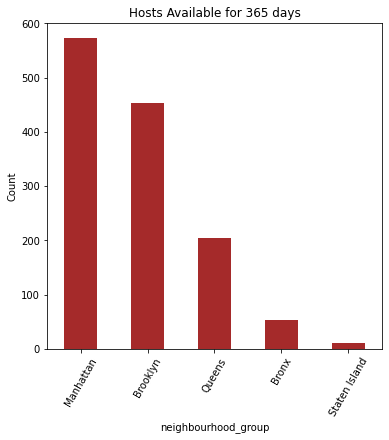

In [23]:
# Visualize the above data grouping under Neighbourhood group using 'Bar chart'.

host_available_365_group = host_available_365.groupby(['neighbourhood_group'])['neighbourhood_group'].count().sort_values(ascending=False).plot(kind='bar', figsize=(6,6), 
                                                                                                      title = 'Hosts Available for 365 days',color='brown')
plt.ylabel('Count')
plt.xticks(rotation=60)
host_available_365_group

###Now from the above data let's find the **Top 5 host name in Manhattan who has more host ID.**

###If a host name has more host id means the host is providing more Homes/Apartments.

In [24]:
top_5_hosts = host_available_365.groupby(['host_name'])['host_id'].count().sort_values(ascending=False) 
top_5_hosts.head(5)

host_name
Kara       26
Ken        24
Mike       21
Sergii     20
Stanley    17
Name: host_id, dtype: int64

###Let's visualize the relationships between the below quantities.
####1. Price vs Neighbourhood Group
####2. Price vs Room Type
####3. Price vs Availability for 365

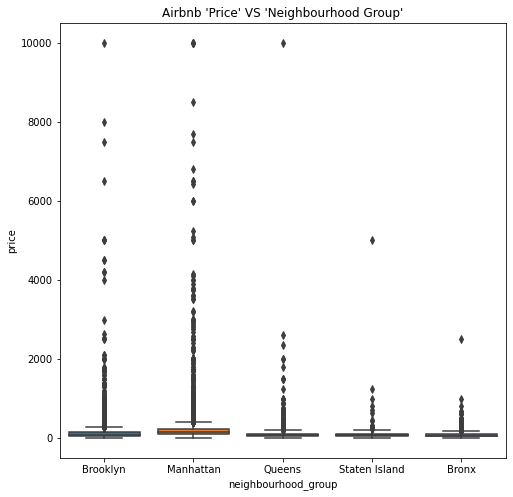

In [27]:
#Let's find the relationship insights between the price and Neighbourhood groups for Airbnb NYC
# Box plot-

fig = plt.figure(figsize = (8,8))
ax = sns.boxplot(x = airbnbCopy['neighbourhood_group'], y = airbnbCopy['price'], data = airbnbCopy)
plt.title("Airbnb 'Price' VS 'Neighbourhood Group'")
plt.show()

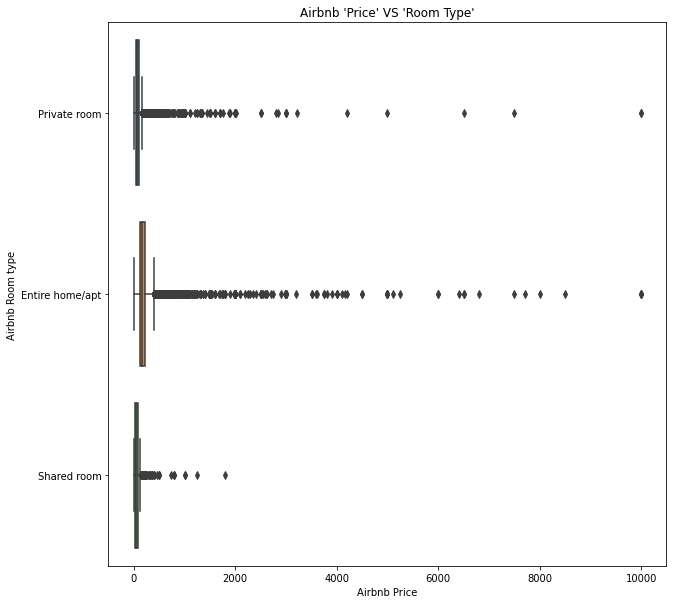

In [34]:
# Price VS Room type

fig2 = plt.figure(figsize=(10,10))
ar = sns.boxplot(x = airbnbCopy['price'], y = airbnbCopy['room_type'], data = airbnbCopy)
plt.xlabel('Airbnb Price')
plt.ylabel('Airbnb Room type')
plt.title("Airbnb 'Price' VS 'Room Type'")
plt.show()


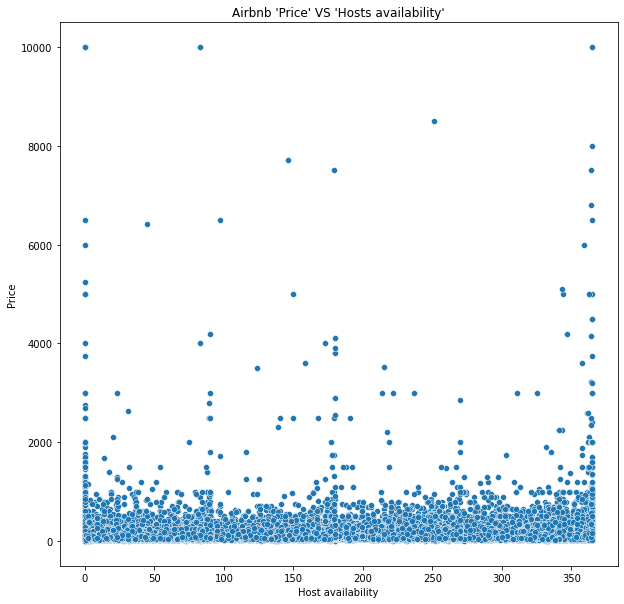

In [39]:
# Price vs Availability for 365 days

fig3 = plt.figure(figsize=(10,10))
ap = sns.scatterplot(x = airbnbCopy['availability_365'], y = airbnbCopy['price'], data = airbnbCopy)
plt.xlabel('Host availability')
plt.ylabel('Price')
plt.title("Airbnb 'Price' VS 'Hosts availability'")
plt.show()


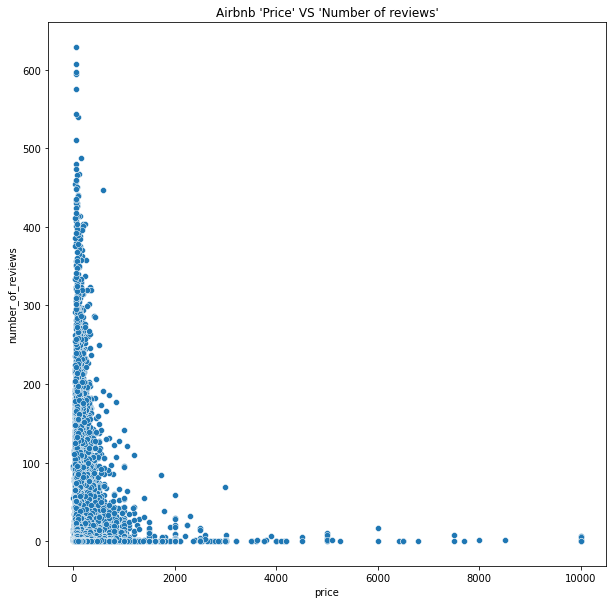

In [41]:
#Price VS Number of reviews

fig4 = plt.figure(figsize=(10,10))
an = sns.scatterplot(x = airbnbCopy['price'], y = airbnbCopy['number_of_reviews'])
plt.title("Airbnb 'Price' VS 'Number of reviews'")
plt.show()
